# Preparando o ambiente

## Instalações - Estrutura, integridade, valores ausentes e duplicidades

### Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import seaborn as sb
import chardet
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive', True)
OutPath = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.4 Resultados e-ou arquivos de saída/"

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



Mounted at /content/drive



### Datasets

In [ ]:
filePathAndName = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.1 Base de dados/SINANTB_01a23.csv"

dfSINAN = pd.read_csv(filePathAndName, sep=';', encoding = "UTF-8", index_col=None)
dfSINAN = dfSINAN.loc[:, ~dfSINAN.columns.str.contains('^Unnamed')]

print(dfSINAN.columns.values)


<ipython-input-2-e69b5860767f>:3: DtypeWarning: Columns (8,17,20,21,32,37,38,43,44,46,47,49,58,60,61,66,76,81,87,96) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSINAN = pd.read_csv(filePathAndName, sep=';', encoding = "UTF-8", index_col=None)


['TP_NOT' 'ID_AGRAVO' 'DT_NOTIFIC' 'NU_ANO' 'SG_UF_NOT' 'ID_MUNICIP'
 'ID_REGIONA' 'DT_DIAG' 'ANO_NASC' 'NU_IDADE_N' 'CS_SEXO' 'CS_GESTANT'
 'CS_RACA' 'CS_ESCOL_N' 'SG_UF' 'ID_MN_RESI' 'ID_RG_RESI' 'ID_PAIS'
 'NDUPLIC_N' 'IN_VINCULA' 'DT_DIGITA' 'DT_TRANSUS' 'DT_TRANSDM'
 'DT_TRANSSM' 'DT_TRANSRM' 'DT_TRANSRS' 'DT_TRANSSE' 'CS_FLXRET'
 'FLXRECEBI' 'MIGRADO_W' 'ID_OCUPA_N' 'TRATAMENTO' 'INSTITUCIO'
 'RAIOX_TORA' 'TESTE_TUBE' 'FORMA' 'EXTRAPU1_N' 'EXTRAPU2_N' 'EXTRAPUL_O'
 'AGRAVAIDS' 'AGRAVALCOO' 'AGRAVDIABE' 'AGRAVDOENC' 'AGRAVOUTRA'
 'AGRAVOUTDE' 'BACILOSC_E' 'BACILOS_E2' 'BACILOSC_O' 'CULTURA_ES'
 'CULTURA_OU' 'HIV' 'HISTOPATOL' 'DT_INIC_TR' 'RIFAMPICIN' 'ISONIAZIDA'
 'ETAMBUTOL' 'ESTREPTOMI' 'PIRAZINAMI' 'ETIONAMIDA' 'OUTRAS' 'OUTRAS_DES'
 'TRAT_SUPER' 'NU_CONTATO' 'DOENCA_TRA' 'SG_UF_AT' 'ID_MUNIC_A'
 'DT_NOTI_AT' 'SG_UF_2' 'ID_MUNIC_2' 'BACILOSC_1' 'BACILOSC_2'
 'BACILOSC_3' 'BACILOSC_4' 'BACILOSC_5' 'BACILOSC_6' 'TRATSUP_AT'
 'DT_MUDANCA' 'NU_COMU_EX' 'SITUA_9_M' 'SITUA_12_M' 'SI

# Pré-processamento

## Remoção das linhas vazias

Essas linhas não possuíam nenhum dos sintomas preenchidos, então por conta disso, resolvemos desconsiderá-las.

In [ ]:
base = dfSINAN
#Não devemos excluir os Situa_ence = NAN pois segundo josé mário devemos consdierar como desfecho desfavorável
# print(f'Shape ANTES remover linhas com NaN na coluna SITUA_ENCE: {base.shape}')
# base.dropna(subset=['SITUA_ENCE'], how='any', inplace = True)
# print(f'Shape APÓS remover linhas com NaN na coluna SITUA_ENCE: {base.shape}')
# #base.head()

# Linhas totalmente vazias: 39.364
# Linhas após remoção das linhas vazias: 2.052.347

In [ ]:
print(base.columns.values)

['TP_NOT' 'ID_AGRAVO' 'DT_NOTIFIC' 'NU_ANO' 'SG_UF_NOT' 'ID_MUNICIP'
 'ID_REGIONA' 'DT_DIAG' 'ANO_NASC' 'NU_IDADE_N' 'CS_SEXO' 'CS_GESTANT'
 'CS_RACA' 'CS_ESCOL_N' 'SG_UF' 'ID_MN_RESI' 'ID_RG_RESI' 'ID_PAIS'
 'NDUPLIC_N' 'IN_VINCULA' 'DT_DIGITA' 'DT_TRANSUS' 'DT_TRANSDM'
 'DT_TRANSSM' 'DT_TRANSRM' 'DT_TRANSRS' 'DT_TRANSSE' 'CS_FLXRET'
 'FLXRECEBI' 'MIGRADO_W' 'ID_OCUPA_N' 'TRATAMENTO' 'INSTITUCIO'
 'RAIOX_TORA' 'TESTE_TUBE' 'FORMA' 'EXTRAPU1_N' 'EXTRAPU2_N' 'EXTRAPUL_O'
 'AGRAVAIDS' 'AGRAVALCOO' 'AGRAVDIABE' 'AGRAVDOENC' 'AGRAVOUTRA'
 'AGRAVOUTDE' 'BACILOSC_E' 'BACILOS_E2' 'BACILOSC_O' 'CULTURA_ES'
 'CULTURA_OU' 'HIV' 'HISTOPATOL' 'DT_INIC_TR' 'RIFAMPICIN' 'ISONIAZIDA'
 'ETAMBUTOL' 'ESTREPTOMI' 'PIRAZINAMI' 'ETIONAMIDA' 'OUTRAS' 'OUTRAS_DES'
 'TRAT_SUPER' 'NU_CONTATO' 'DOENCA_TRA' 'SG_UF_AT' 'ID_MUNIC_A'
 'DT_NOTI_AT' 'SG_UF_2' 'ID_MUNIC_2' 'BACILOSC_1' 'BACILOSC_2'
 'BACILOSC_3' 'BACILOSC_4' 'BACILOSC_5' 'BACILOSC_6' 'TRATSUP_AT'
 'DT_MUDANCA' 'NU_COMU_EX' 'SITUA_9_M' 'SITUA_12_M' 'SI

In [ ]:
base.shape

(2091711, 108)

In [ ]:
import pandas as pd

dataset = base

valor_ignorado = "Ignorado"

missing_counts = dataset.isna().sum() + (dataset == valor_ignorado).sum()

missing_data_report = pd.DataFrame({
    'Coluna': dataset.columns,
    'Registros Vazios (NaN + Ignorado)': missing_counts,
    'Percentual de Vazios (%)': (missing_counts / len(dataset)) * 100
})

missing_data_report = missing_data_report.sort_values(by='Percentual de Vazios (%)', ascending=False).reset_index(drop=True)

print(missing_data_report)

                    Coluna  Registros Vazios (NaN + Ignorado)  \
0               DT_TRANSSE                            2091711   
1                CS_FLXRET                            2091711   
2               DT_TRANSRS                            2091711   
3               DT_TRANSRM                            2091711   
4               DT_TRANSSM                            2091711   
5                FLXRECEBI                            2091711   
6               DT_TRANSDM                            2091711   
7             IDADEminutos                            2091711   
8               IDADEhoras                            2091003   
9                IDADEdias                            2088631   
10              IDADEmeses                            2085977   
11              DT_TRANSUS                            2085904   
12              EXTRAPU2_N                            2069193   
13              MUN_TRANSF                            2035190   
14               UF_TRANS

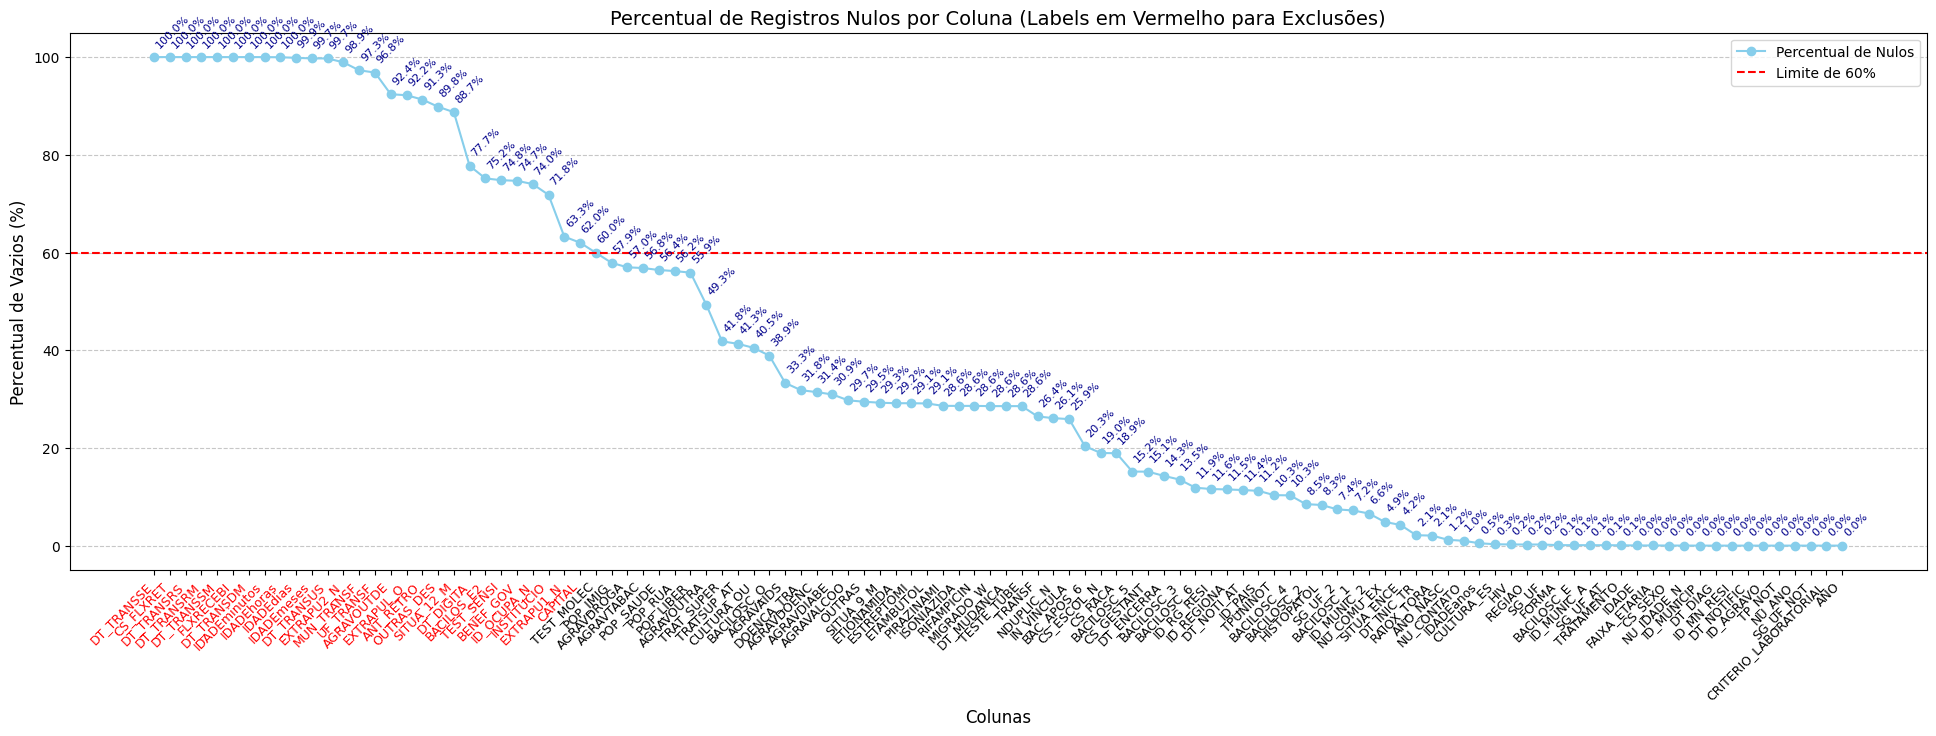

In [ ]:
import matplotlib.pyplot as plt  # Corrigido aqui
limite=60
plt.figure(figsize=(20, 8))

# Plotar o gráfico principal
plt.plot(missing_data_report['Coluna'], missing_data_report['Percentual de Vazios (%)'],
         marker='o', color='skyblue', label='Percentual de Nulos')

plt.axhline(limite, color='red', linestyle='--', label=f'Limite de {limite}%')

# Personalizar as labels do eixo X
x_labels = missing_data_report['Coluna']
x_colors = ['red' if valor > limite else 'black' for valor in missing_data_report['Percentual de Vazios (%)']]

# Adicionar as labels com cores personalizadas
plt.xticks(
    ticks=range(len(x_labels)),  # Posição das labels
    labels=x_labels,            # Textos das labels
    rotation=45,                # Rotação das labels
    ha='right',                 # Alinhamento das labels
    fontsize=9
)

# Pinta individualmente as labels que excedem o limite
ax = plt.gca()
for tick_label, color in zip(ax.get_xticklabels(), x_colors):
    tick_label.set_color(color)

# Adicionar o percentual em cada ponto com rotação e fonte menor
for i, valor in enumerate(missing_data_report['Percentual de Vazios (%)']):
    plt.text(i, valor + 2, f"{valor:.1f}%", rotation=45, ha='left', fontsize=8, color='darkblue')

# Configurações do gráfico
plt.xlabel("Colunas", fontsize=12)
plt.ylabel("Percentual de Vazios (%)", fontsize=12)
plt.title("Percentual de Registros Nulos por Coluna (Labels em Vermelho para Exclusões)", fontsize=14)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)

# Exibir o gráfico
plt.show()


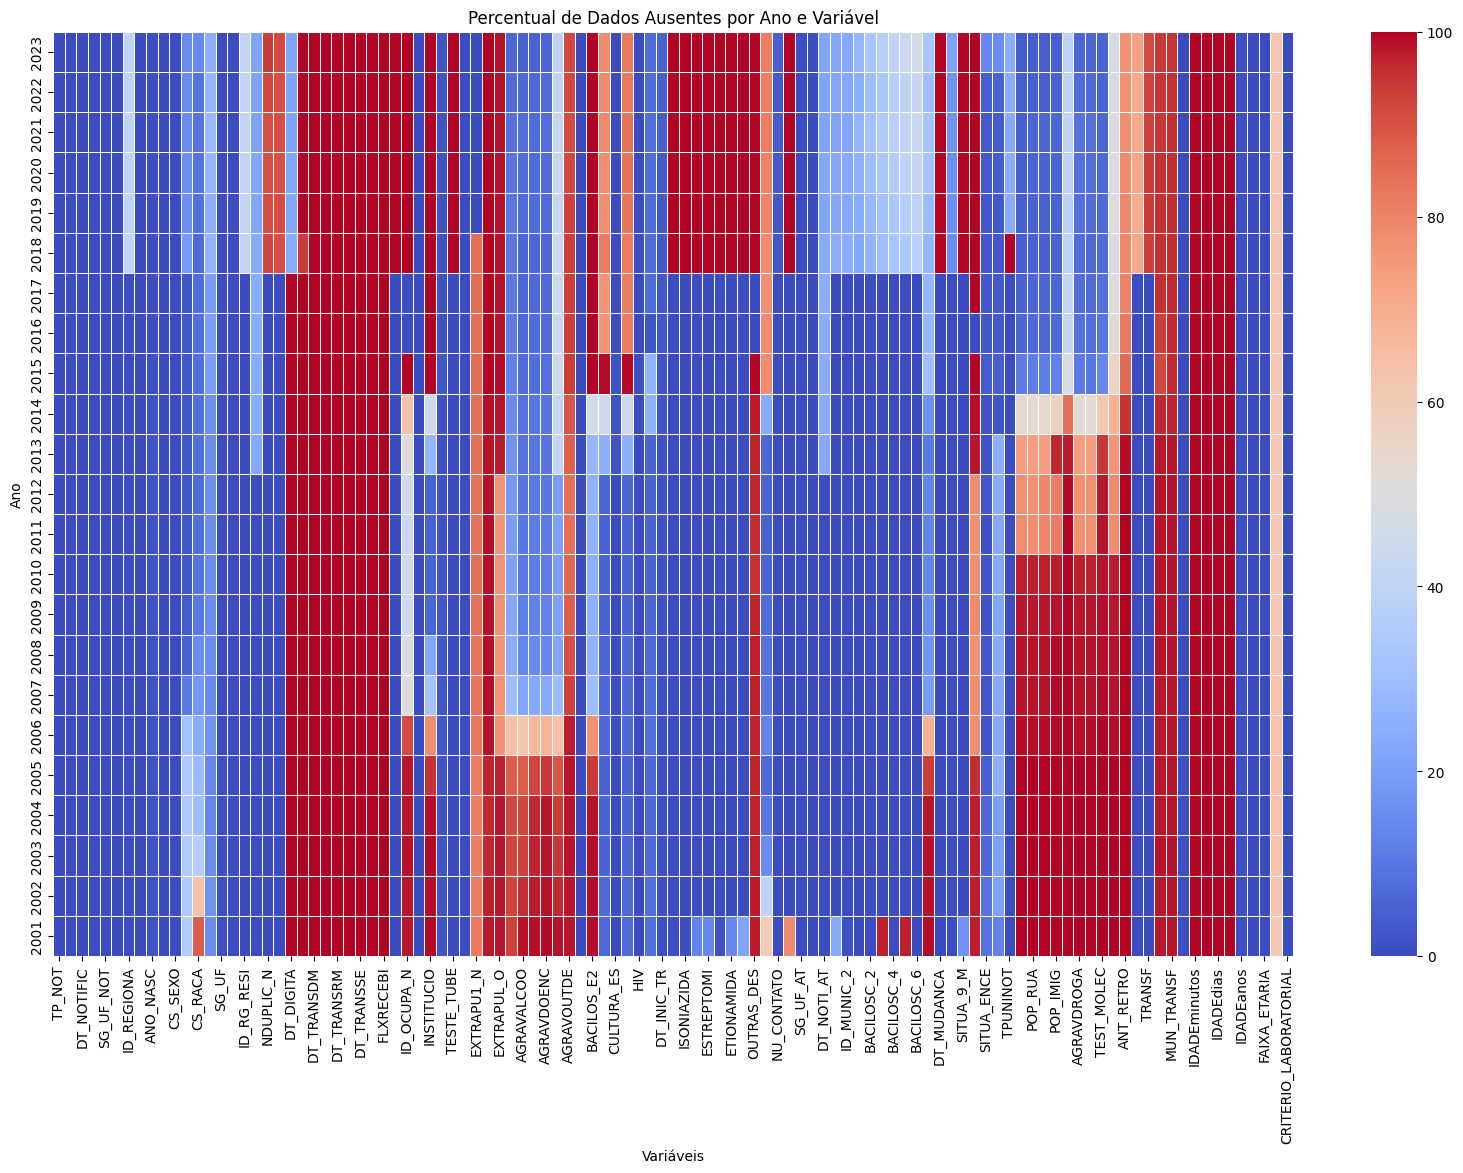

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 12))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.7,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



## Remoção das colunas vazias (+60% dados nulos)

---



In [ ]:
# Filtrar as colunas que têm mais de 60% de valores vazios ou "Ignorado"
colunas_vermelhas = missing_data_report.loc[
    missing_data_report['Percentual de Vazios (%)'] > 60, 'Coluna'
].tolist()

print(colunas_vermelhas)  # Exibir a lista


['DT_TRANSRS', 'DT_TRANSDM', 'IDADEminutos', 'FLXRECEBI', 'CS_FLXRET', 'DT_TRANSSE', 'DT_TRANSRM', 'DT_TRANSSM', 'IDADEhoras', 'IDADEdias', 'IDADEmeses', 'DT_TRANSUS', 'EXTRAPU2_N', 'MUN_TRANSF', 'UF_TRANSF', 'AGRAVOUTDE', 'EXTRAPUL_O', 'ANT_RETRO', 'OUTRAS_DES', 'SITUA_12_M', 'DT_DIGITA', 'BACILOS_E2', 'TEST_SENSI', 'BENEF_GOV', 'ID_OCUPA_N', 'INSTITUCIO', 'EXTRAPU1_N', 'CAPITAL']


In [ ]:
print(f'Shape ANTES remover as colunas vazias: {base.shape}')
colunas_vazias = colunas_vermelhas


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape APÓS remover as colunas vazias: {base.shape}')
#base.head()


Shape ANTES remover as colunas vazias: (2091711, 108)
Shape APÓS remover as colunas vazias: (2091711, 80)


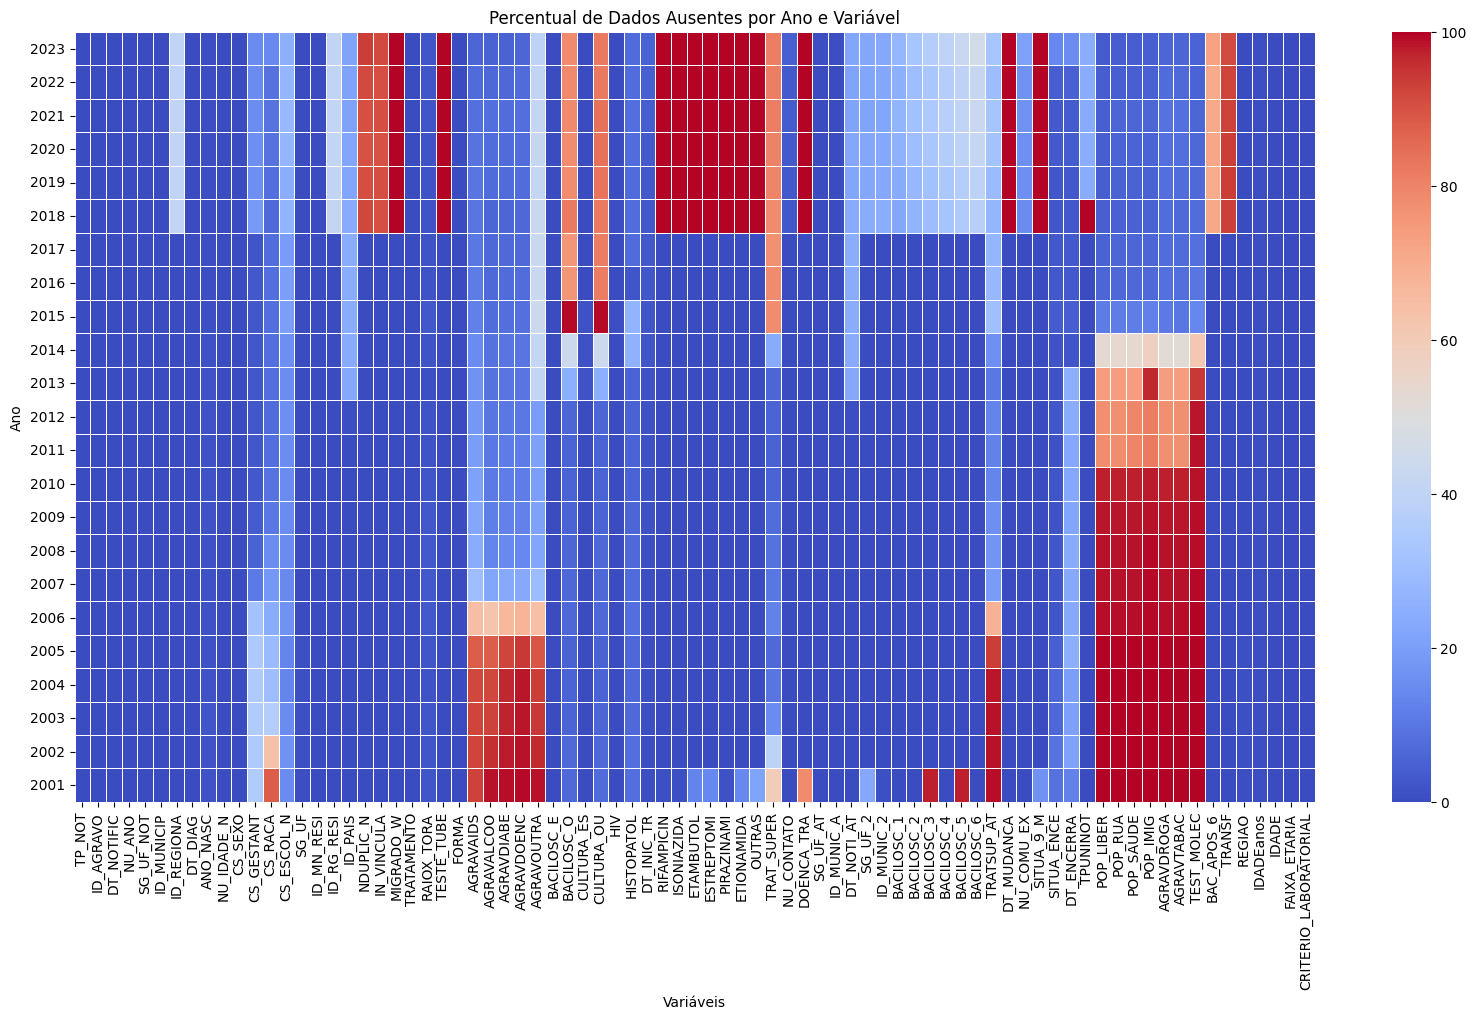

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



In [ ]:
base = base[base["ANO"] >= 2010]

In [ ]:
print(f'Shape ANTES remover as colunas com dados vazios após o corte do ano do dataset: {base.shape}')
colunas_vazias = [
    'MIGRADO_W',
    'TESTE_TUBE',
    'RIFAMPICIN',
    'ISONIAZIDA',
    'ETAMBUTOL',
    'ESTREPTOMI',
    'PIRAZINAMI',
    'ETIONAMIDA',
    'OUTRAS',
    'TRAT_SUPER',
    'DOENCA_TRA',
    'DT_MUDANCA',
    'SITUA_9_M'
    ]


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape ANTES remover as colunas com dados vazios após o corte do ano do dataset: {base.shape}')
#base.head()


Shape ANTES remover as colunas com dados vazios após o corte do ano do dataset: (1290055, 80)
Shape ANTES remover as colunas com dados vazios após o corte do ano do dataset: (1290055, 67)


<ipython-input-13-fbe9a8c61bbe>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.drop(columns=colunas_vazias, inplace = True)


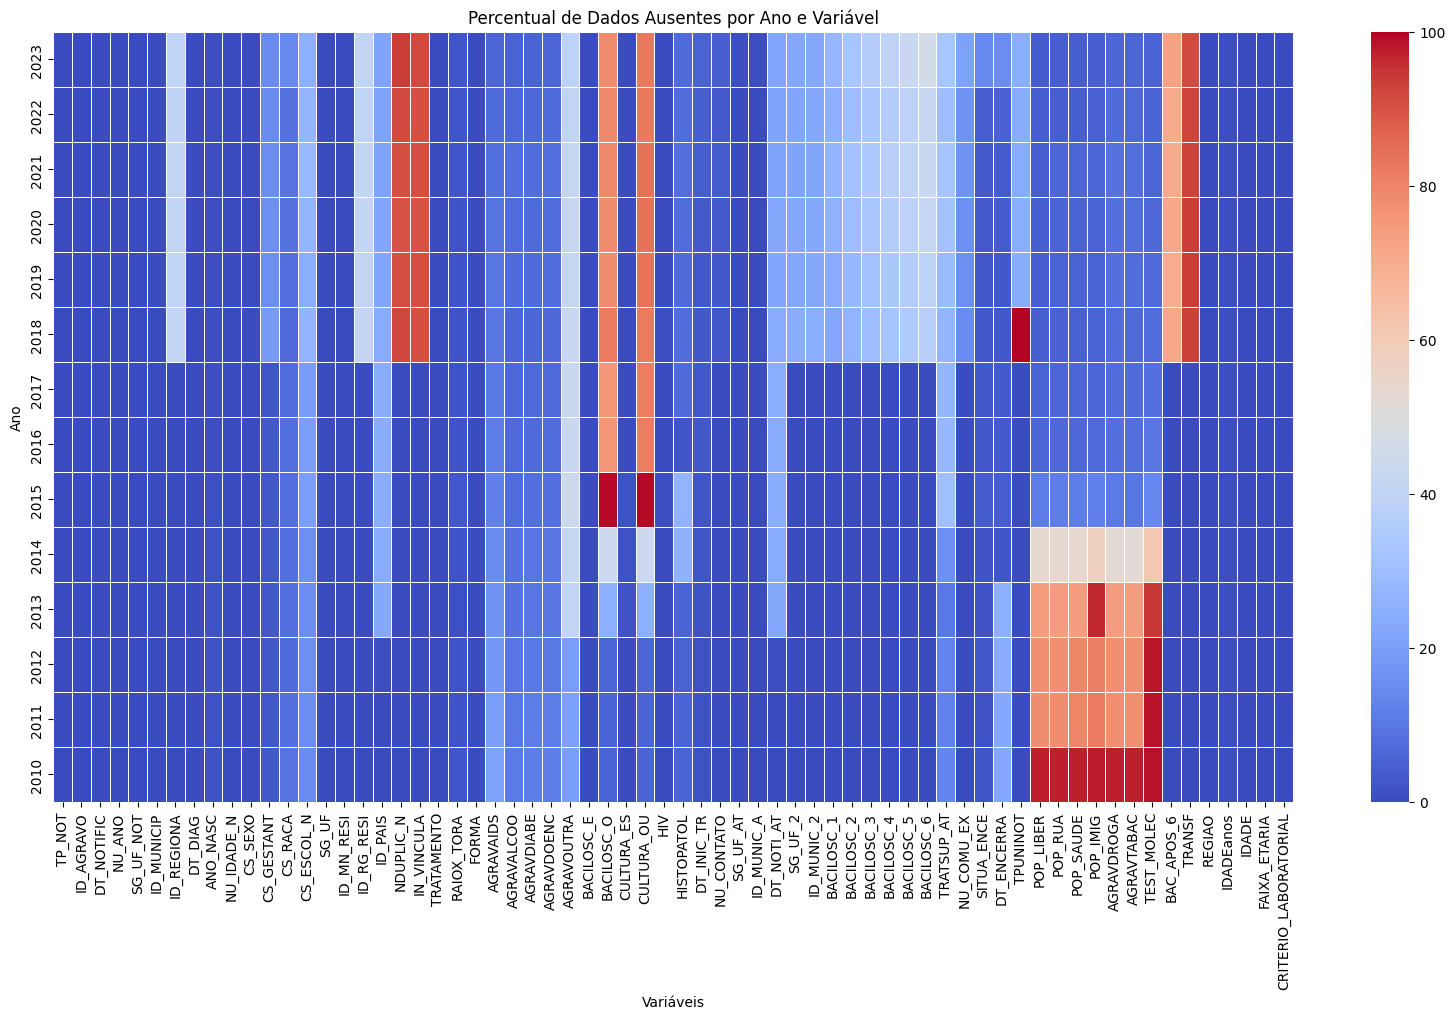

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



In [ ]:
# base2 = base.dropna()  # Remove linhas com qualquer NaN
# #base = base[~base.isin(["Ignorado"]).any(axis=1)]  # Remove linhas que tenham "Ignorado"
# base2.shape

# # Contar a quantidade de registros de cada categoria
# contagem = base2['SITUA_ENCE'].value_counts()

# # Calcular o percentual de cada categoria
# percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# # Criar um DataFrame com os resultados
# relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# # Exibir o relatório
# print(relatorio_situa_ence)


# Adicionando coluna DIAS_EM_TRATAMENTOS através de (DT_ENCERRA e *DT_NOTIFIC*)
# Remoção de 296.591 linhas por DT_ENCERRA ser maior que DT_NOTIFIC e removendo outliers períodos superiores a 5 anos de tratamento (1800 dias)

In [ ]:
# Convertendo as colunas para o tipo datetime (caso ainda não estejam)
# Remover as linhas com datas fora do intervalo
base['DT_ENCERRA'] = pd.to_datetime(base['DT_ENCERRA'], errors='coerce', format='%Y-%m-%d')
base['DT_NOTIFIC'] = pd.to_datetime(base['DT_NOTIFIC'], errors='coerce', format='%Y-%m-%d')

base = base[base['DT_NOTIFIC'].apply(pd.to_datetime, errors='coerce').notna()]

base['DT_ENCERRA'] = pd.to_datetime(base['DT_ENCERRA'])
base['DT_NOTIFIC'] = pd.to_datetime(base['DT_NOTIFIC'])

print(f'Shape ANTES de remover os registros do SINAN com data de encerramento superior a notificação indicando erro: {base.shape}')
# Calculando os dias em tratamento
base['DIAS_EM_TRATAMENTO'] = (base['DT_ENCERRA'] - base['DT_NOTIFIC']).dt.days


# Removendo as linhas onde 'DIAS_EM_TRATAMENTO' é negativo ou superior a 1800 dias
base = base[(base['DIAS_EM_TRATAMENTO'] >= 0) & (base['DIAS_EM_TRATAMENTO'] <= 1800)]

print(f'Shape DEPOIS de remover os registros do SINAN com data de encerramento superior a notificação indicando erro: {base.shape}')



<ipython-input-16-a44da25c77f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['DT_ENCERRA'] = pd.to_datetime(base['DT_ENCERRA'], errors='coerce', format='%Y-%m-%d')
<ipython-input-16-a44da25c77f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['DT_NOTIFIC'] = pd.to_datetime(base['DT_NOTIFIC'], errors='coerce', format='%Y-%m-%d')


Shape ANTES de remover os registros do SINAN com data de encerramento superior a notificação indicando erro: (1290055, 67)
Shape DEPOIS de remover os registros do SINAN com data de encerramento superior a notificação indicando erro: (1156480, 68)


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
base['DIAS_EM_TRATAMENTO'].describe()

,DIAS_EM_TRATAMENTO
count,1156480.00
mean,174.62
std,109.63
min,0.00
25%,120.00
50%,184.00
75%,213.00
max,1796.00


# Remoção de colunas não importantes para modelos de Classificação (IA)

In [ ]:
base.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'ANO_NASC', 'NU_IDADE_N',
       'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'NDUPLIC_N', 'IN_VINCULA', 'TRATAMENTO',
       'RAIOX_TORA', 'FORMA', 'AGRAVAIDS', 'AGRAVALCOO', 'AGRAVDIABE',
       'AGRAVDOENC', 'AGRAVOUTRA', 'BACILOSC_E', 'BACILOSC_O', 'CULTURA_ES',
       'CULTURA_OU', 'HIV', 'HISTOPATOL', 'DT_INIC_TR', 'NU_CONTATO',
       'SG_UF_AT', 'ID_MUNIC_A', 'DT_NOTI_AT', 'SG_UF_2', 'ID_MUNIC_2',
       'BACILOSC_1', 'BACILOSC_2', 'BACILOSC_3', 'BACILOSC_4', 'BACILOSC_5',
       'BACILOSC_6', 'TRATSUP_AT', 'NU_COMU_EX', 'SITUA_ENCE', 'DT_ENCERRA',
       'TPUNINOT', 'POP_LIBER', 'POP_RUA', 'POP_SAUDE', 'POP_IMIG',
       'AGRAVDROGA', 'AGRAVTABAC', 'TEST_MOLEC', 'BAC_APOS_6', 'TRANSF',
       'REGIAO', 'IDADEanos', 'IDADE', 'FAIXA_ETARIA', 'CRITERIO_LABORATORIAL',
       'ANO', 'DIAS_EM_TRATAMENTO'],
      

In [ ]:
base.sample(2)

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_DIAG,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,NDUPLIC_N,IN_VINCULA,TRATAMENTO,RAIOX_TORA,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,BACILOSC_E,BACILOSC_O,CULTURA_ES,CULTURA_OU,HIV,HISTOPATOL,DT_INIC_TR,NU_CONTATO,SG_UF_AT,ID_MUNIC_A,DT_NOTI_AT,SG_UF_2,ID_MUNIC_2,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,NU_COMU_EX,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,BAC_APOS_6,TRANSF,REGIAO,IDADEanos,IDADE,FAIXA_ETARIA,CRITERIO_LABORATORIAL,ANO,DIAS_EM_TRATAMENTO
1926358,Individual,A169,2022-05-06,2022,Bahia,292150.00,141.00,2022-05-06,1961.00,4061.00,Masculino,Não se aplica,Branca,NaN,Bahia,292150,141.00,BRASIL,NaN,NaN,Caso Novo,Suspeito,Pulmonar,NaN,NaN,NaN,NaN,NaN,Positiva,NaN,Não realizado,NaN,Não realizado,BAAR positivo,2022-05-09,4.00,29.00,292150.00,2022-05-06,29.00,292150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Cura,2022-12-05,0.00,Não,Não,Não,Não,NaN,NaN,Não realizado,NaN,NaN,Nordeste,61.00,61.00,60 a 64 anos,Com critério laboratorial,2022,213.00
1621483,Individual,A169,2019-03-01,2019,Rio de Janeiro,330455.00,NaN,2019-02-28,1985.00,4034.00,Feminino,Não,Parda,Ensino médio completo (antigo colegial ou 2o g...,Rio de Janeiro,330455,NaN,BRASIL,NaN,NaN,Caso Novo,Suspeito,Pulmonar + Extrapulmonar,Sim,Não,Não,Não,Não,Não realizada,NaN,Não realizado,NaN,Positivo,BAAR positivo,2019-03-01,5.00,33.00,330455.00,2019-03-01,33.00,330455.00,3.00,4.00,4.00,4.00,4.00,4.00,Sim,5.00,Cura,2019-10-11,0.00,Não,Não,Não,Não,Não,Não,Não realizado,4.00,NaN,Sudeste,34.00,34.00,30 a 34 anos,Sem critério laboratorial,2019,224.00


In [ ]:
base2 = base

In [ ]:
print(f'Shape ANTES remover as colunas não importantes para o contexto do problema e da IA classificativa: {base.shape}')
colunas_vazias = [
    'ID_AGRAVO',
    'DT_NOTIFIC',
    'NU_ANO',
    'ID_PAIS',
    'DT_DIAG',
    'ANO_NASC',
    'NU_IDADE_N',
    'SG_UF',
    'ID_MUNICIP',
    'ID_RG_RESI',
    'NDUPLIC_N',
    'IN_VINCULA',
    'NU_CONTATO',
    'SG_UF_AT',
    'ID_MUNIC_A',
    'DT_NOTI_AT',
    'SG_UF_2',
    'ID_MUNIC_2',
    'DT_ENCERRA',
    'TPUNINOT',
    'TRANSF',
    #'ANO', #deixar o ano apenas para geração de gráficos.
    'TP_NOT',
    #'REGIAO',
    'IDADEanos',
    #'INSTITUCIO',
    'DT_INIC_TR',
    #'DT_MUDANCA',
    'NU_COMU_EX',
    'FAIXA_ETARIA',
    'CRITERIO_LABORATORIAL',
    'TP_NOT',
    'ID_AGRAVO',
    #'MIGRADO_W',
    'ID_MN_RESI', #o município poderia ser relevante, entretanto as características ficariam enormes usando one-hot-encoding, deixei somente a região
    'ID_REGIONA',
    'SG_UF_NOT',
    'CS_GESTANT'
    ]


base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape APÓS remover as colunas não importantes para o contexto do problema e da IA classificativa: {base.shape}')
#base.head()


Shape ANTES remover as colunas não importantes para o contexto do problema e da IA classificativa: (1156480, 68)
Shape APÓS remover as colunas não importantes para o contexto do problema e da IA classificativa: (1156480, 37)


In [ ]:

base.sample(2)

,CS_SEXO,CS_RACA,CS_ESCOL_N,TRATAMENTO,RAIOX_TORA,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,BACILOSC_E,BACILOSC_O,CULTURA_ES,CULTURA_OU,HIV,HISTOPATOL,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,TRATSUP_AT,SITUA_ENCE,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,BAC_APOS_6,REGIAO,IDADE,ANO,DIAS_EM_TRATAMENTO
1596711,Masculino,Parda,Ensino médio incompleto (antigo colegial ou 2o...,Caso Novo,Suspeito,Pulmonar,Não,Sim,Não,Não,Não,Positiva,NaN,Não realizado,NaN,Negativo,Não realizado,3.00,3.00,3.00,NaN,NaN,NaN,Não,Abandono,Não,Sim,Não,Não,Sim,Sim,Não realizado,NaN,Sudeste,33.00,2019,33.00
1537848,Masculino,Parda,Ensino médio incompleto (antigo colegial ou 2o...,Caso Novo,Não realizado,Pulmonar,Não,Sim,Não,Não,Não,Não realizada,NaN,Negativa,NaN,Negativo,Não realizado,3.00,3.00,3.00,2.00,2.00,2.00,Sim,Cura,Sim,Não,Não,Não,Sim,Sim,Detectável sensível à Rifampicina,NaN,Norte,28.00,2018,184.00


# Remoção de colunas laboratoriais, medicações e/ou futuras (exames com 1,2,3,4,56 meses)

In [ ]:
print(f'Shape ANTES remover as colunas laboratoriais, medicações e/ou futuras: {base.shape}')
colunas_vazias = [
    #'RAIOX_TORA',
    #'TESTE_TUBE',
    #'FORMA',
    #'EXTRAPU1_N',
    #'EXTRAPU2_N',
    'BACILOSC_E',
    #'BACILOS_E2',
    'BACILOSC_O',
    'CULTURA_ES',
    'CULTURA_OU',
    'AGRAVAIDS',
    #'RIFAMPICIN',
    #'ISONIAZIDA',
    #'ETAMBUTOL',
    #'ESTREPTOMI',
    #'PIRAZINAMI',
    #'ETIONAMIDA',
    #'OUTRAS',
    'BACILOSC_1',
    'BACILOSC_2',
    'BACILOSC_3',
    'BACILOSC_4',
    'BACILOSC_5',
    'BACILOSC_6',
    'TRATSUP_AT',
    #'SITUA_9_M',
    #'TEST_MOLEC',
    #'TEST_SENSI',
    #'ANT_RETRO',
    'BAC_APOS_6',
    'HISTOPATOL',
    'HIV',
    'RAIOX_TORA',
    'FORMA',
    'TEST_MOLEC'
    ]

base.drop(columns=colunas_vazias, inplace = True)
print(f'Shape ANTES remover as colunas laboratoriais, medicações e/ou futuras: {base.shape}')
#base.head()


Shape ANTES remover as colunas laboratoriais, medicações e/ou futuras: (1156480, 37)
Shape ANTES remover as colunas laboratoriais, medicações e/ou futuras: (1156480, 19)


In [ ]:
base.sample(2)

,CS_SEXO,CS_RACA,CS_ESCOL_N,TRATAMENTO,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,SITUA_ENCE,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,AGRAVDROGA,AGRAVTABAC,REGIAO,IDADE,ANO,DIAS_EM_TRATAMENTO
1337076,Masculino,Parda,Ensino fundamental completo (antigo ginásio ou...,Caso Novo,Não,Não,Não,Não,Cura,Não,Não,Não,Não,Não,Não,Norte,26.00,2016,186.00
2005455,Masculino,Parda,Analfabeto,Reingresso após abandono,Sim,Ignorado,Ignorado,Ignorado,Cura,Não,Não,Não,Não,Não,Sim,Nordeste,50.00,2023,7.00


In [ ]:
base.shape

(1156480, 19)

# Verificando quantos registros vazios tem em cada coluna, após o pré-processamento

In [ ]:
import pandas as pd

# Supondo que o dataset já esteja carregado
dataset = base

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categórica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores únicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informações ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categórico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna numérica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Numérico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualização
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



,Coluna,Tipo,Categorias,Qtd Categorias,Percentual Nulos,Info Categorias
0,CS_SEXO,Categórico,"[Feminino, Masculino, Ignorado]",3.00,0.00,"{'Masculino': 68.92925083010515, 'Feminino': 3..."
1,CS_RACA,Categórico,"[Indígena, Parda, Preta, Branca, Amarela, Igno...",6.00,2.10,"{'Parda': 49.099537116770044, 'Branca': 29.385..."
2,CS_ESCOL_N,Categórico,"[Ignorado, 5a à 8a série incompleta do EF (ant...",11.00,3.61,{'5a à 8a série incompleta do EF (antigo ginás...
3,TRATAMENTO,Categórico,"[Caso Novo, Reingresso após abandono, Recidiva...",7.00,0.00,"{'Caso Novo': 79.75641602102932, 'Reingresso a..."
4,AGRAVALCOO,Categórico,"[Não, Sim, Ignorado]",3.00,0.65,"{'Não': 74.5102715254671, 'Sim': 18.2196312642..."
5,AGRAVDIABE,Categórico,"[Não, Sim, Ignorado]",3.00,0.70,"{'Não': 84.74364042611366, 'Sim': 7.6926158063..."
6,AGRAVDOENC,Categórico,"[Não, Sim, Ignorado]",3.00,0.84,"{'Não': 89.75717031213486, 'Ignorado': 7.74800..."
7,AGRAVOUTRA,Categórico,"[Não, Sim, Ignorado]",3.00,15.67,"{'Não': 62.452950326002586, 'Ignorado': 26.239..."
8,SITUA_ENCE,Categórico,"[Cura, Óbito por outra causa, Óbito por TB, Tr...",11.00,0.14,"{'Cura': 67.41336312152544, 'Abandono': 14.045..."
9,POP_LIBER,Categórico,"[Ignorado, Não, Sim]",3.00,0.88,"{'Não': 63.263922754741245, 'Ignorado': 28.947..."


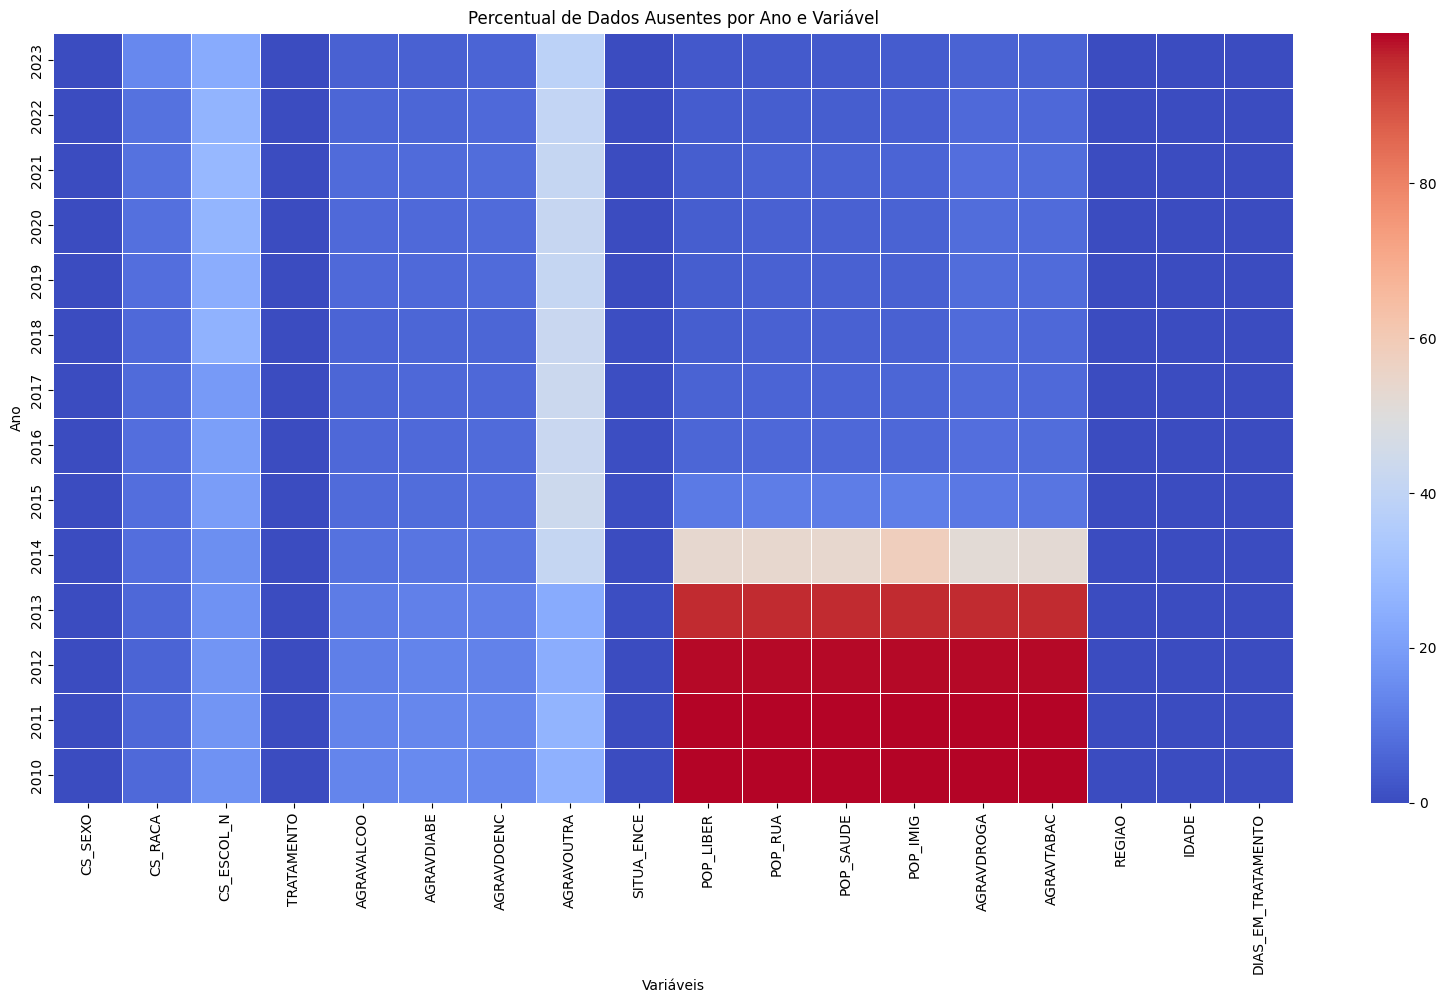

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



Remover registros NaN em qualquer coluna.

In [ ]:
base['SITUA_ENCE'] = base['SITUA_ENCE'].fillna('Vazio') #substituir NaN por Vazio, que vai ser utilizado para agrupamento em desfavorável segundo José Mário
base2 = base.dropna()  # Remove linhas com qualquer NaN
base2.shape

# Contar a quantidade de registros de cada categoria
contagem = base2['SITUA_ENCE'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relatório
print(relatorio_situa_ence)


                        Contagem  Percentual (%)
SITUA_ENCE                                      
Cura                      633205           66.95
Abandono                  128796           13.62
Transferência              71997            7.61
Óbito por outra causa      41596            4.40
Óbito por TB               36062            3.81
TB-DR                      10430            1.10
Mudança de diagnóstico      8548            0.90
Abandono primário           6066            0.64
Mudança de esquema          4814            0.51
Ignorado                    2357            0.25
Vazio                       1219            0.13
Falência                     669            0.07


In [ ]:
base2.shape

(945759, 19)

In [ ]:
import pandas as pd

# Supondo que o dataset já esteja carregado
dataset = base2

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categórica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores únicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informações ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categórico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna numérica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Numérico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualização
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



,Coluna,Tipo,Categorias,Qtd Categorias,Percentual Nulos,Info Categorias
0,CS_SEXO,Categórico,"[Feminino, Masculino, Ignorado]",3.00,0.00,"{'Masculino': 68.34225209593563, 'Feminino': 3..."
1,CS_RACA,Categórico,"[Indígena, Parda, Preta, Branca, Amarela, Igno...",6.00,0.00,"{'Parda': 49.13482187322563, 'Branca': 28.8417..."
2,CS_ESCOL_N,Categórico,"[Ignorado, 5a à 8a série incompleta do EF (ant...",11.00,0.00,"{'Ignorado': 20.12901806908525, '5a à 8a série..."
3,TRATAMENTO,Categórico,"[Caso Novo, Reingresso após abandono, Recidiva...",7.00,0.00,"{'Caso Novo': 79.84772019087315, 'Reingresso a..."
4,AGRAVALCOO,Categórico,"[Não, Sim, Ignorado]",3.00,0.00,"{'Não': 74.01166681998268, 'Sim': 17.591373700..."
5,AGRAVDIABE,Categórico,"[Não, Sim, Ignorado]",3.00,0.00,"{'Não': 83.66327996878698, 'Ignorado': 8.75106..."
6,AGRAVDOENC,Categórico,"[Não, Sim, Ignorado]",3.00,0.00,"{'Não': 88.48723617750399, 'Ignorado': 8.95756..."
7,AGRAVOUTRA,Categórico,"[Não, Sim, Ignorado]",3.00,0.00,"{'Não': 61.97424502436667, 'Ignorado': 26.7995..."
8,SITUA_ENCE,Categórico,"[Cura, Óbito por outra causa, Óbito por TB, Tr...",12.00,0.00,"{'Cura': 66.95204592290425, 'Abandono': 13.618..."
9,POP_LIBER,Categórico,"[Ignorado, Não, Sim]",3.00,0.00,"{'Não': 58.05569917917778, 'Ignorado': 34.8635..."


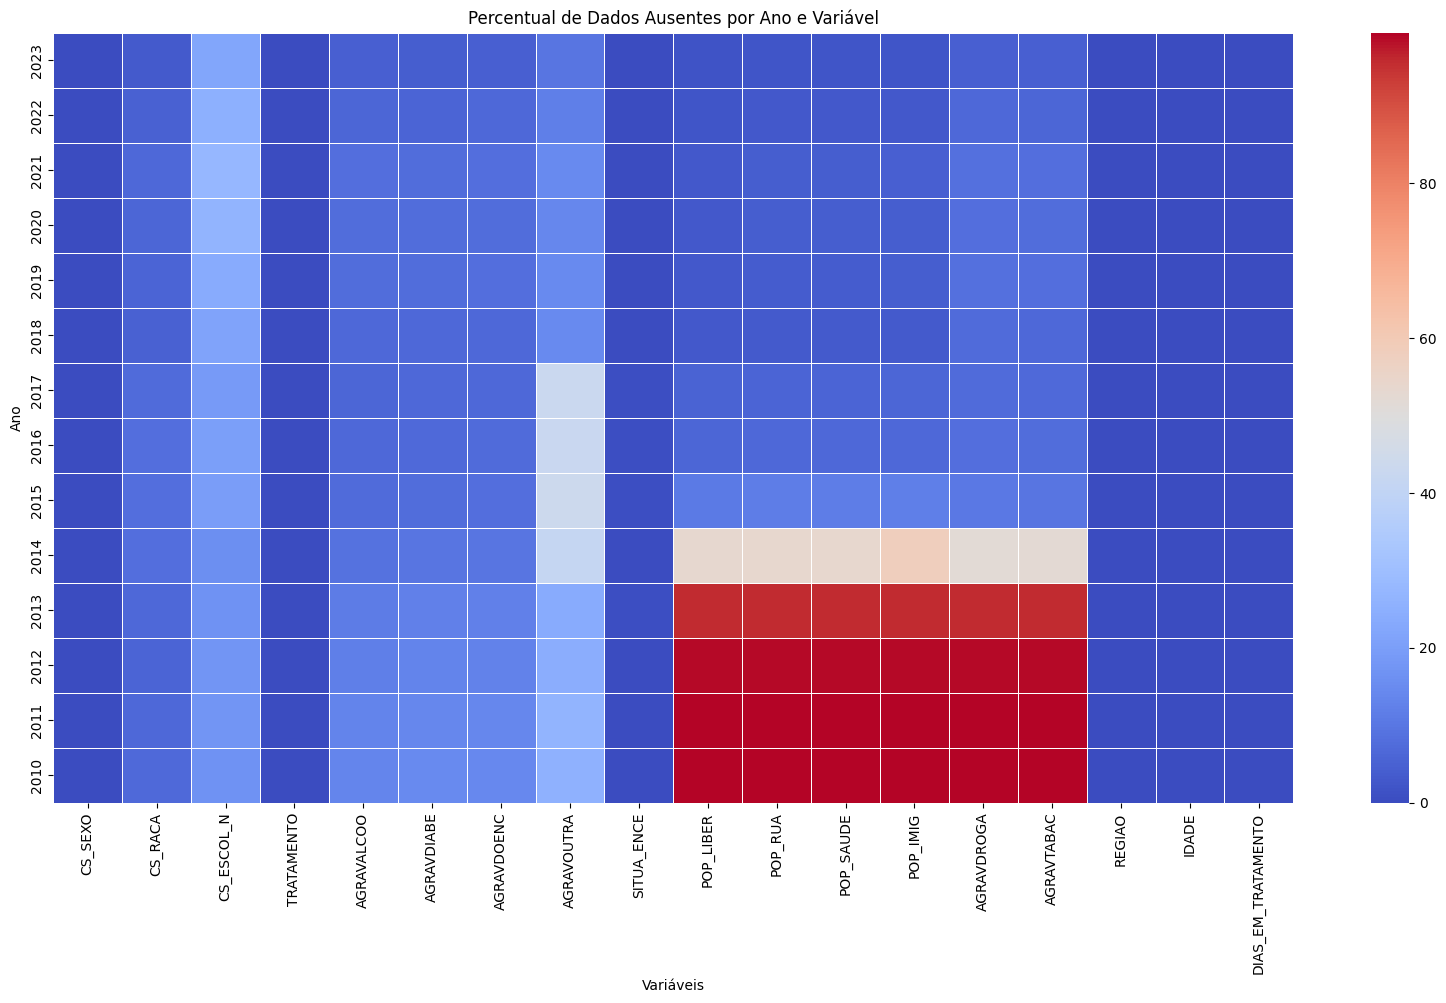

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'base' seja o DataFrame original
dataset = base2

# Define o valor que representa "Ignorado"
valor_ignorado = "Ignorado"

# Certifique-se de que há uma coluna "ANO" para agrupar os dados
if 'ANO' not in dataset.columns:
    raise ValueError("A base de dados precisa ter uma coluna chamada 'ANO' para a análise temporal.")

dataset = dataset.dropna(subset=['ANO'])  # Remove linhas com ANO vazio
dataset['ANO'] = dataset['ANO'].astype(int)

# Função para calcular a completude dos dados por ano
def calcular_completude_por_ano(df, colunas):
    anos = sorted(df['ANO'].dropna().unique(), reverse=True)  # Ordena os anos corretamente

    resultados = []
    for ano in anos:
        df_ano = df[df['ANO'] == ano]
        missing_counts = df_ano.isna().sum() + (df_ano == valor_ignorado).sum()
        percent_missing = (missing_counts / len(df_ano)) * 100

        percent_missing_dict = percent_missing.to_dict()  # Converte para dicionário
        percent_missing_dict.pop("ANO", None)  # Remove "ANO" se existir no dicionário

        resultados.append({"ANO": ano, **percent_missing_dict})  # Adiciona o ano corretamente

    return pd.DataFrame(resultados)

# Calcula a completude por ano (passando apenas as colunas que não são 'ANO')
completude_por_ano = calcular_completude_por_ano(dataset, dataset.columns.drop('ANO'))

# Plotando o gráfico
#plt.figure(figsize=(12, 6))
#for coluna in completude_por_ano.columns[1:]:  # Ignorar a coluna "ANO"
    #print(completude_por_ano['ANO'])
#    plt.plot(completude_por_ano['ANO'], completude_por_ano[coluna], label=coluna)

#plt.xlabel("ANO")
#plt.ylabel("Percentual de Dados Vazios (%)")
#plt.title("Evolução da Completude dos Dados por Ano")
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.grid(True)
#plt.show()

# Exibir os primeiros registros para inspeção
#print(completude_por_ano.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))  # Aumenta a largura

# Criar o heatmap
sns.heatmap(completude_por_ano.set_index("ANO"),
            cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5,
            annot_kws={"size": 7})  # Reduz tamanho do texto interno

# Ajustar rótulos
plt.xlabel("Variáveis")
plt.ylabel("Ano")
plt.title("Percentual de Dados Ausentes por Ano e Variável")
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X

# Exibir o gráfico
plt.show()



In [ ]:
valores_para_remover = ['Óbito por outra causa', 'Mudança de diagnóstico', 'TB-DR', 'Mudança de esquema']
base2 = base2[~base2['SITUA_ENCE'].isin(valores_para_remover)]

In [ ]:
base2.shape

(880371, 19)

In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['SITUA_ENCE'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['SITUA_ENCE'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relatório
print(relatorio_situa_ence)


                   Contagem  Percentual (%)
SITUA_ENCE                                 
Cura                 633205           71.92
Abandono             128796           14.63
Transferência         71997            8.18
Óbito por TB          36062            4.10
Abandono primário      6066            0.69
Ignorado               2357            0.27
Vazio                  1219            0.14
Falência                669            0.08


In [ ]:

# Definindo os critérios para as categorias
favoravel = ['Cura']
desfavoravel = ['Abandono', 'Óbito por TB', 'Ignorado', 'Abandono primário', 'Mudança de esquema', 'Falência', 'Vazio', 'Transferência']

# Criando a nova coluna 'DESFECHO' com base nos valores da coluna 'SITUA_ENCE'
base2['DESFECHO'] = base2['SITUA_ENCE'].apply(lambda x: 'Favorável' if x in favoravel else ('Desfavorável' if x in desfavoravel else 'Outros'))



In [ ]:
# Verificando o resultado
print(base2[['SITUA_ENCE', 'DESFECHO']].sample(5))

        SITUA_ENCE      DESFECHO
1252546       Cura     Favorável
1661822   Abandono  Desfavorável
1301796       Cura     Favorável
1671381       Cura     Favorável
1111314       Cura     Favorável


In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['DESFECHO'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['DESFECHO'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relatório
print(relatorio_situa_ence)


              Contagem  Percentual (%)
DESFECHO                              
Favorável       633205           71.92
Desfavorável    247166           28.08


In [ ]:
# Contar a quantidade de registros de cada categoria
contagem = base2['REGIAO'].value_counts()

# Calcular o percentual de cada categoria
percentual = base2['REGIAO'].value_counts(normalize=True) * 100

# Criar um DataFrame com os resultados
relatorio_situa_ence = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})

# Exibir o relatório
print(relatorio_situa_ence)


              Contagem  Percentual (%)
REGIAO                                
Sudeste         315096           35.79
Nordeste        268664           30.52
Sul             131335           14.92
Norte           115576           13.13
Centro-Oeste     49548            5.63
Ignorado           152            0.02


In [ ]:
import pandas as pd

# Supondo que o dataset já esteja carregado
dataset = base2

# Criar um DataFrame para armazenar os resultados
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categórica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores únicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        # Adicionar informações ao DataFrame
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categórico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna numérica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Numérico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualização
columns_info_df = pd.DataFrame(columns_info)

# Exibir o DataFrame gerado
columns_info_df


#columns_info_df.to_csv('columns_info.csv', index=False)



,Coluna,Tipo,Categorias,Qtd Categorias,Percentual Nulos,Info Categorias
0,CS_SEXO,Categórico,"[Feminino, Masculino, Ignorado]",3.00,0.00,"{'Masculino': 68.33107860208935, 'Feminino': 3..."
1,CS_RACA,Categórico,"[Indígena, Parda, Preta, Branca, Amarela, Igno...",6.00,0.00,"{'Parda': 49.30239637607327, 'Branca': 28.6033..."
2,CS_ESCOL_N,Categórico,"[Ignorado, 5a à 8a série incompleta do EF (ant...",11.00,0.00,"{'Ignorado': 19.6221820119018, '5a à 8a série ..."
3,TRATAMENTO,Categórico,"[Caso Novo, Recidiva, Transferência, Reingress...",7.00,0.00,"{'Caso Novo': 80.30432624427655, 'Reingresso a..."
4,AGRAVALCOO,Categórico,"[Não, Sim, Ignorado]",3.00,0.00,"{'Não': 74.30356065794989, 'Sim': 17.384602627..."
5,AGRAVDIABE,Categórico,"[Não, Sim, Ignorado]",3.00,0.00,"{'Não': 83.85737376628717, 'Ignorado': 8.72859..."
6,AGRAVDOENC,Categórico,"[Não, Sim, Ignorado]",3.00,0.00,"{'Não': 88.6002605719634, 'Ignorado': 8.899202..."
7,AGRAVOUTRA,Categórico,"[Não, Sim, Ignorado]",3.00,0.00,"{'Não': 62.311684505736785, 'Ignorado': 27.162..."
8,SITUA_ENCE,Categórico,"[Cura, Óbito por TB, Transferência, Abandono, ...",8.00,0.00,"{'Cura': 71.92479079842475, 'Abandono': 14.629..."
9,POP_LIBER,Categórico,"[Ignorado, Não, Sim]",3.00,0.00,"{'Não': 57.211448355295666, 'Ignorado': 35.420..."


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import shutil

# Montar o Google Drive (caso ainda não esteja montado)
from google.colab import drive
drive.mount('/content/drive')

# Definir o caminho onde o arquivo ZIP será salvo no Google Drive
OutPath = "/content/drive/MyDrive/Colab Notebooks/5.SINANTB_Nacional_2001-2023/1.4 Resultados e-ou arquivos de saída/"

# Criar uma pasta temporária para salvar os gráficos
temp_folder = "plots_temp"
os.makedirs(temp_folder, exist_ok=True)

# Supondo que o dataset já esteja carregado e seja chamado "base2"
dataset = base2

# ---------------------------
# Análise das Colunas do Dataset
# ---------------------------
columns_info = []

for column in dataset.columns:
    column_type = dataset[column].dtype  # Tipo da coluna
    missing_percentage = dataset[column].isna().mean() * 100  # Percentual de valores nulos

    if column_type == 'object' or column_type.name == 'category':
        # Coluna categórica: listar categorias e seus percentuais
        unique_values = dataset[column].dropna().unique()  # Valores únicos (excluindo NaN)
        categories_count = len(unique_values)  # Quantidade de categorias
        categories_info = dataset[column].value_counts(normalize=True) * 100  # Percentual de cada categoria

        columns_info.append({
            'Coluna': column,
            'Tipo': 'Categórico',
            'Categorias': unique_values.tolist(),
            'Qtd Categorias': categories_count,
            'Percentual Nulos': missing_percentage,
            'Info Categorias': categories_info.to_dict()
        })

    elif column_type in ['datetime64[ns]', 'datetime64[ns, UTC]']:
        # Coluna de data
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Data',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

    else:
        # Coluna numérica
        columns_info.append({
            'Coluna': column,
            'Tipo': 'Numérico',
            'Percentual Nulos': missing_percentage,
            'Info Categorias': None
        })

# Converter para DataFrame para visualização e salvar em CSV
columns_info_df = pd.DataFrame(columns_info)
print("Informações das colunas:")
print(columns_info_df)

# Salvar o DataFrame em um arquivo CSV
columns_info_csv = os.path.join(OutPath, "columns_info.csv")
columns_info_df.to_csv(columns_info_csv, index=False)
print(f"Arquivo CSV salvo em: {columns_info_csv}")

# ---------------------------
# Gerar gráficos para cada coluna em relação ao DESFECHO
# ---------------------------
for column in dataset.columns:
    if column == "DESFECHO":
        continue  # Não queremos um gráfico da própria variável alvo

    plt.figure(figsize=(8, 5))

    if dataset[column].dtype in ['object', 'category']:
        # Para colunas categóricas, usamos countplot
        sns.countplot(x=column, hue="DESFECHO", data=dataset, palette="Set2")
        plt.xticks(rotation=45)
        plt.title(f"Distribuição de {column} por DESFECHO")

    elif np.issubdtype(dataset[column].dtype, np.number):
        # Para colunas numéricas, usamos histogramas
        sns.histplot(data=dataset, x=column, hue="DESFECHO", kde=True, bins=30, palette="Set1")
        plt.title(f"Distribuição de {column} por DESFECHO")

    elif np.issubdtype(dataset[column].dtype, np.datetime64):
        # Se for data, converte para ano e plota
        dataset["year"] = dataset[column].dt.year
        sns.countplot(x="year", hue="DESFECHO", data=dataset, palette="Set3")
        plt.xticks(rotation=45)
        plt.title(f"Distribuição de {column} (Ano) por DESFECHO")

    # Salvar gráfico na pasta temporária
    plot_filename = os.path.join(temp_folder, f"{column}.png")
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.close()

print(f"Gráficos salvos na pasta temporária: {temp_folder}")

# ===============================
# Compactando as imagens em um arquivo ZIP na pasta OutPath
# ===============================
zip_filename = os.path.join(OutPath, "plots.zip")
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(temp_folder):
        for file in files:
            file_path = os.path.join(root, file)
            # arcname=file garante que o arquivo seja salvo no zip sem o caminho completo
            zipf.write(file_path, arcname=file)

print(f"Arquivo ZIP salvo em: {zip_filename}")

# Remover a pasta temporária após a compactação
shutil.rmtree(temp_folder)
print("Pasta temporária removida.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Informações das colunas:
                Coluna        Tipo  \
0              CS_SEXO  Categórico   
1              CS_RACA  Categórico   
2           CS_ESCOL_N  Categórico   
3           TRATAMENTO  Categórico   
4           AGRAVALCOO  Categórico   
5           AGRAVDIABE  Categórico   
6           AGRAVDOENC  Categórico   
7           AGRAVOUTRA  Categórico   
8           SITUA_ENCE  Categórico   
9            POP_LIBER  Categórico   
10             POP_RUA  Categórico   
11           POP_SAUDE  Categórico   
12            POP_IMIG  Categórico   
13          AGRAVDROGA  Categórico   
14          AGRAVTABAC  Categórico   
15              REGIAO  Categórico   
16               IDADE    Numérico   
17                 ANO    Numérico   
18  DIAS_EM_TRATAMENTO    Numérico   
19            DESFECHO  Categórico   

                                           Cate

In [ ]:
#fazer analise de quais colunas vao sair, e documentar.

In [ ]:

colunas_vazias = [
    'ANO',
    'SITUA_ENCE'
    ]

base2.drop(columns=colunas_vazias, inplace = True)
print(f'{base2.shape}')



(880371, 18)


# Transformação dos dados - texto > categoria

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = base2

# Criar um LabelEncoder para cada coluna categórica
label_encoders = {}
mappings = {}  # Dicionário para armazenar a mapeação de cada coluna

for col in df.select_dtypes(include=['object']).columns:  # Seleciona colunas categóricas
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Aplica o encoder
    label_encoders[col] = le  # Salva o encoder caso precise reverter depois
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Armazena a mapeação original -> código

# Exibir resumo das transformações corretamente
print("\nResumo das transformações categóricas:\n")
for col, mapping in mappings.items():
    print(f"Coluna: {col}")
    for original, encoded in mapping.items():  # Agora usamos o mapeamento correto
        print(f"  {encoded} -> {original}")
    print("-" * 40)  # Separador visual para cada coluna



Resumo das transformações categóricas:

Coluna: CS_SEXO
  0 -> Feminino
  1 -> Ignorado
  2 -> Masculino
----------------------------------------
Coluna: CS_RACA
  0 -> Amarela
  1 -> Branca
  2 -> Ignorado
  3 -> Indígena
  4 -> Parda
  5 -> Preta
----------------------------------------
Coluna: CS_ESCOL_N
  0 -> 1a a 4a série incompleta do EF
  1 -> 4a série completa do EF (antigo 1o grau)
  2 -> 5a à 8a série incompleta do EF (antigo ginásio ou 1o grau)
  3 -> Analfabeto
  4 -> Educação superior completa
  5 -> Educação superior incompleta
  6 -> Ensino fundamental completo (antigo ginásio ou 1o grau)
  7 -> Ensino médio completo (antigo colegial ou 2o grau)
  8 -> Ensino médio incompleto (antigo colegial ou 2o grau)
  9 -> Ignorado
  10 -> Não se aplica
----------------------------------------
Coluna: TRATAMENTO
  0 -> Caso Novo
  1 -> Ignorado
  2 -> Não sabe
  3 -> Pós-óbito
  4 -> Recidiva
  5 -> Reingresso após abandono
  6 -> Transferência
------------------------------------

In [ ]:
import pickle

# Salvar o mapeamento em um arquivo pickle
with open(OutPath+'mappings_labels.pkl', 'wb') as f:
    pickle.dump(mappings, f)


**LEMBRAR DE NORMALIZAR DIAS_EM_TRATAMENTO e salvar a NORMALIZACAO (INDICES DE NORMALIZACAO)**

In [ ]:
from datetime import datetime

now = datetime.now()  # current date and time
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")

print("date and time:", date_time)
df.to_csv(OutPath + 'Sinantb_desfechos_' + date_time + '.csv', encoding='utf-8', index=False)


date and time: 03-14-2025_23-07-30


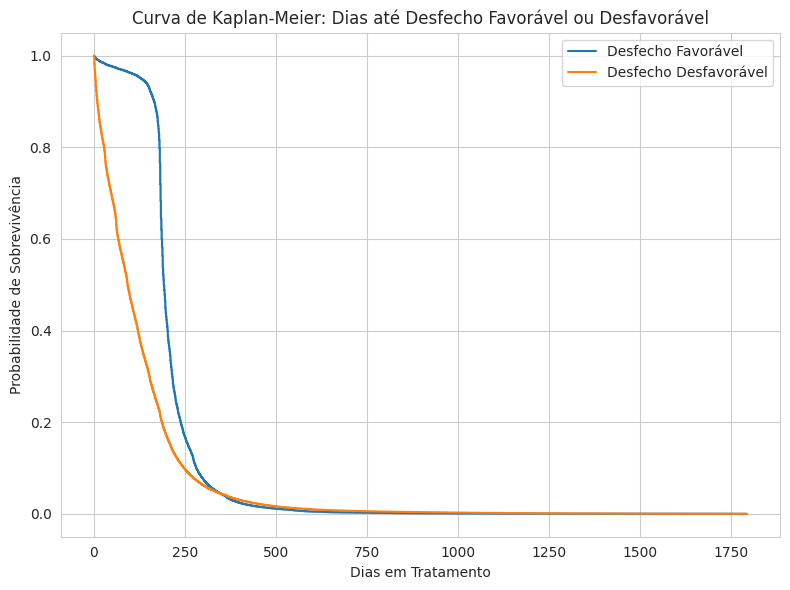

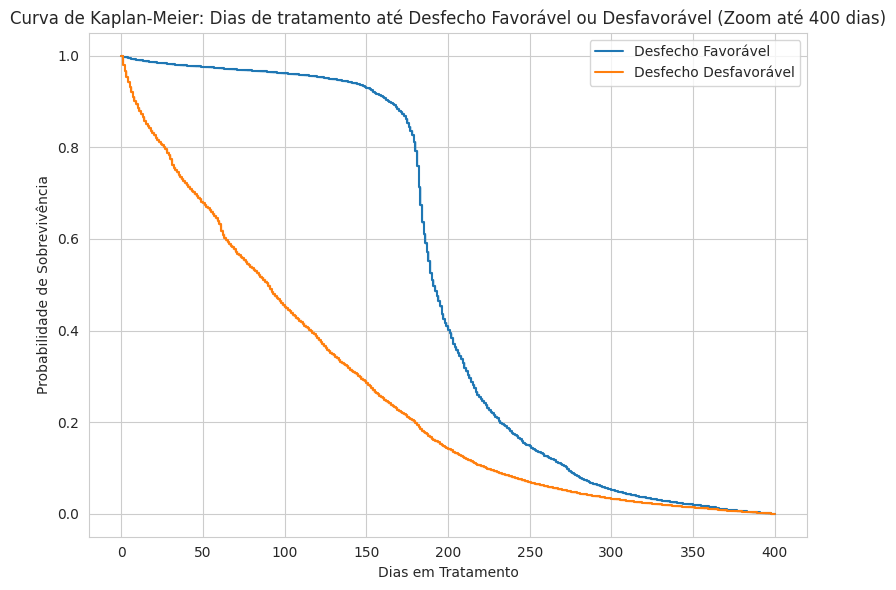

Curvas de Kaplan-Meier geradas e exibidas na tela.


In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Filtrar os dados para o desfecho favorável (1) e desfavorável (0), removendo registros com DIAS = 0
df_favoravel = df[(df["DESFECHO"] == 1) & (df["DIAS_EM_TRATAMENTO"] > 0)]
df_desfavoravel = df[(df["DESFECHO"] == 0) & (df["DIAS_EM_TRATAMENTO"] > 0)]

# Criando o Kaplan-Meier Fitter
kmf_favoravel = KaplanMeierFitter()
kmf_desfavoravel = KaplanMeierFitter()

# Ajustando o Kaplan-Meier para os pacientes com desfecho favorável (1)
plt.figure(figsize=(8, 6))
kmf_favoravel.fit(df_favoravel["DIAS_EM_TRATAMENTO"], label="Desfecho Favorável")
kmf_favoravel.plot()

# Ajustando o Kaplan-Meier para os pacientes com desfecho desfavorável (0)
kmf_desfavoravel.fit(df_desfavoravel["DIAS_EM_TRATAMENTO"], label="Desfecho Desfavorável")
kmf_desfavoravel.plot()

plt.title("Curva de Kaplan-Meier: Dias até Desfecho Favorável ou Desfavorável")
plt.xlabel("Dias em Tratamento")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend()
plt.tight_layout()
plt.show()  # Exibe o gráfico na tela

# Agora vamos fazer o "zoom" para os primeiros 400 dias
plt.figure(figsize=(8, 6))

# Plotando apenas os dados com até 400 dias de tratamento
kmf_favoravel.fit(df_favoravel[df_favoravel["DIAS_EM_TRATAMENTO"] <= 400]["DIAS_EM_TRATAMENTO"], label="Desfecho Favorável")
kmf_favoravel.plot()

kmf_desfavoravel.fit(df_desfavoravel[df_desfavoravel["DIAS_EM_TRATAMENTO"] <= 400]["DIAS_EM_TRATAMENTO"], label="Desfecho Desfavorável")
kmf_desfavoravel.plot()

plt.title("Curva de Kaplan-Meier: Dias de tratamento até Desfecho Favorável ou Desfavorável (Zoom até 400 dias)")
plt.xlabel("Dias em Tratamento")
plt.ylabel("Probabilidade de Sobrevivência")
plt.legend()
plt.tight_layout()
plt.show()  # Exibe o gráfico na tela

# Mensagem para indicar que os gráficos foram gerados
print("Curvas de Kaplan-Meier geradas e exibidas na tela.")
